## DBSCAN Clustering 

 **Density-Based Spatial Clustering of Applications with Noise (DBSCAN)** is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

- When we collects the data we see some **dataset errors** these errors are refered as **Noise**
Noisy data unnecessarily increases the amount of **storage space** required and can also adversely affect the results of any **data mining analysis.**
- **DBSCAN** overcomes from it 

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

from itertools import islice,cycle

In [97]:
# Configuration options
tot_no_samples = 1000
clusters_centres = [(3,3),(7,7)]
num_classes = len(clusters_centres)
epsilon = 1.0  # epsilon is the radius of neighborhood around the x is also called e neighborhood 
min_samples = 13

In [98]:
# generate the data 
X,y = make_blobs(n_samples = tot_no_samples,centers = clusters_centres,n_features = num_classes,center_box = (0,1),
                 cluster_std = 0.5 )

In [4]:
X,y

(array([[6.78127664, 7.17397641],
        [6.93249765, 6.51409283],
        [6.56942811, 6.90457445],
        ...,
        [7.90530903, 6.61782429],
        [6.54756004, 7.36229033],
        [7.49039321, 8.06491653]]),
 array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 

In [99]:
print(X.shape,type(X))
print(X[:5,:])
y[:5]

(1000, 2) <class 'numpy.ndarray'>
[[7.88045313 6.87716733]
 [6.94023396 6.96423833]
 [3.56081763 2.62541358]
 [2.8878045  2.36822822]
 [6.7491837  6.00199975]]


array([1, 1, 0, 0, 1])

In [100]:
y.shape , type(y)

((1000,), numpy.ndarray)

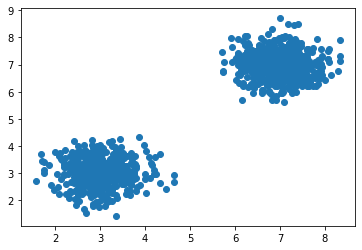

In [101]:
plt.scatter(X[:,0],X[:,1])

Here, we can see the two formed clusters both centroids are (3,3) and (7,7) as we give

In [102]:
# compute dbscan
db = DBSCAN(eps = epsilon, min_samples = min_samples)
dbs = db.fit(X)

In [103]:
db = DBSCAN(eps = epsilon, min_samples = min_samples).fit(X)

In [104]:
labels = dbs.labels_

In [105]:
no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1,axis = 0)

print("Estimated no of clusters: %d" % no_clusters)
print("Estimated no of noise: %d" % no_noise)


Estimated no of clusters: 2
Estimated no of noise: 0


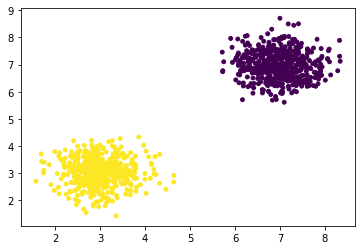

In [108]:
plt.scatter(X[:,0],X[:,1], c= labels, s = 15)      # if I give epsilon = 0.5 it gives 4 noise's  and I gave epsilon = 0.1

In [12]:
from sklearn import cluster,datasets
np.random.seed(0)
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples = n_samples,factor = .5,noise = .08)

In [13]:
print(type(noisy_circles))
print(noisy_circles[0].shape,noisy_circles[1].shape)
print(noisy_circles[0][:5,:])
print(noisy_circles[1][:5]) # this is series so we have given only row of[:5]

<class 'tuple'>
(1500, 2) (1500,)
[[-0.66860703 -0.68582576]
 [ 0.8920046   0.26103005]
 [ 0.57727663 -0.00711419]
 [ 0.85689593  0.33776785]
 [ 0.47628018 -0.26803736]]
[0 0 1 0 1]


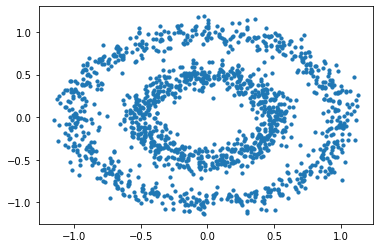

In [14]:
plt.scatter(noisy_circles[0][:,0],noisy_circles[0][:,1], s = 10)

In [115]:
eps = 0.2
X,y = noisy_circles
# normalize the dataset
X = StandardScaler().fit_transform(X)

dbscan = cluster.DBSCAN(eps = eps)
dbscan.fit(X)
#pred = dbscan.labels_.astype(np.int)
y_pred = dbscan.labels_.astype(int)
np.unique(pred)

array([-1,  0,  1])

In [121]:
# creating colors array with color values corresponding to the predicted label
colors = np.full(len(y_pred),"#FE4A49")
colors[:] = np.where(y_pred == 0,'#2AB7CA',colors[:])
colors[:] = np.where(y_pred == 1, '#000000',colors[:])
np.unique(colors)

array(['#000000', '#2AB7CA', '#FE4A49'], dtype='<U7')

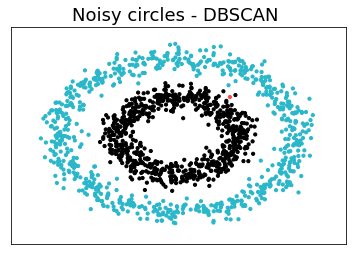

In [117]:
plt.title("Noisy circles - DBSCAN ",size = 18)
plt.scatter(X[:,0],X[:,1],s = 10,color = colors)
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.xticks(())
plt.yticks(())

plt.show()

In [77]:
from sklearn import datasets,cluster
np.random.seed(0)
n_samples = 1500
noisy_moons = datasets.make_moons(n_samples = n_samples,noise = .09)

In [37]:
print(type(noisy_moons))
print(noisy_moons[0].shape,noisy_moons[1].shape)
print(noisy_moons[0][:5,:])
print(noisy_moons[1][:5])

<class 'tuple'>
(1500, 2) (1500,)
[[-0.36874998  0.95368102]
 [ 0.89413327  0.22344373]
 [ 2.07729417  0.49707455]
 [ 0.93194977  0.12521714]
 [ 2.04159164  0.21038924]]
[0 0 1 0 1]


In [38]:
noisy_moons[0]  # 1500 rows 2 columns

array([[-0.36874998,  0.95368102],
       [ 0.89413327,  0.22344373],
       [ 2.07729417,  0.49707455],
       ...,
       [ 1.4006993 , -0.44762642],
       [-0.62448041,  0.80230714],
       [-0.86260988,  0.15140272]])

In [29]:
noisy_moons[1]  # 1500 rows (series)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [27]:
noisy_moons  

(array([[-0.14333347,  1.26403043],
        [-0.05225543,  1.89477294],
        [ 2.77294172,  0.47074552],
        ...,
        [ 1.63708934, -0.63098121],
        [ 0.04532981,  1.5861299 ],
        [ 0.04148392, -0.90940216]]),
 array([0, 0, 1, ..., 1, 0, 0], dtype=int64))

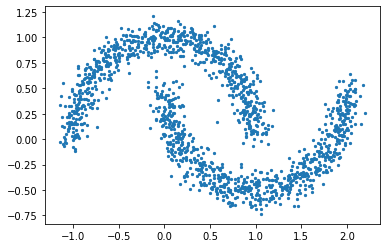

In [78]:
plt.scatter(noisy_moons[0][:,0],noisy_moons[0][:,1],s = 5)  # s is thickness of curve 

In [118]:
eps = 0.2
X,y = noisy_moons
# normalize the dataset
X = StandardScaler().fit_transform(X)

dbscan = cluster.DBSCAN(eps = eps)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(int)
np.unique(pred1)

array([-1,  0,  1])

In [119]:
colors = np.full(len(y_pred), "#A14BA2") #violet clr
colors[:] = np.where(y_pred == 0,"#F1C40F", colors[:]) # yellow clr
colors[:] = np.where(y_pred == -1,"#0E050D",colors[:]) # black clr
np.unique(colors)

array(['#0E050D', '#A14BA2', '#F1C40F'], dtype='<U7')

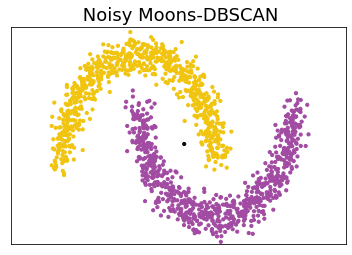

In [120]:
plt.title(" Noisy Moons-DBSCAN",size = 18,)
plt.scatter(X[:,0],X[:,1], s = 10,color = colors)
plt.xlim(-2.5,2.5)  # width of x 
plt.ylim(-2.0,2.0)  # width of y 
plt.xticks(())
plt.yticks(())

plt.show()

Above 2 Examples are in single plot

<ipython-input-126-0d50eca75c18>:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = dbscan.labels_.astype(np.int)
<ipython-input-126-0d50eca75c18>:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.2

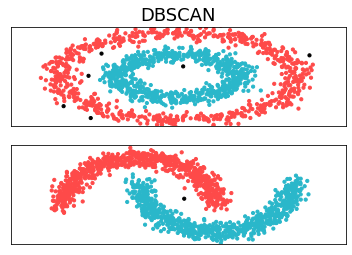

In [126]:
eps = 0.2

datasets = [
    noisy_circles,
    noisy_moons,
]

plot_num=1
for i_dataset, dataset in enumerate(datasets):

    X, y = dataset
    # normalize dataset
    X = StandardScaler().fit_transform(X)
    
    dbscan = cluster.DBSCAN(eps=eps)
    dbscan.fit(X)

    y_pred = dbscan.labels_.astype(np.int)

    #plt.subplot(len(datasets), 1, plot_num)
    plt.subplot(len(datasets), 1, plot_num)
    if i_dataset == 0:
        plt.title('DBSCAN', size=18)

    colors = np.array(list(islice(cycle(['#FE4A49', '#2AB7CA']), 3)))

    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.0, 2.0)
    plt.xticks(())
    plt.yticks(())
    plot_num += 1

plt.show()    